# Examples of NFW Gaussian mixtures

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.colors as pltcol
from gaussmix_nfw import GaussMixNFW,AnisoIntegrals
%matplotlib notebook

In [2]:
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['legend.fontsize'] = 16
mpl.rcParams['legend.labelspacing'] = 0.1

FSIZE = 7 # figure size

#mpl.rcParams.keys()

In [3]:
ai = AnisoIntegrals()

rhoc = 2.7754e11
Dvir = 178.0

# virial mass
def mvir_from_Rvir(Rvir):
    return (4*np.pi*Rvir**3/3)*Dvir*rhoc

.
.
.
## Basic fit

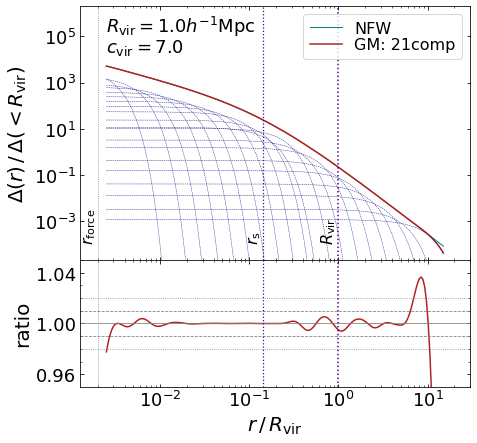

In [4]:
Rvir = 1.0 # virial radius in Mpc/h
cvir = 7.0/Rvir**0.4 # halo concentration

gm = GaussMixNFW(Rvir=Rvir,cvir=cvir)

# gm.WJ and gm.CJ now respectively contain the weights and Gaussian widths of gm.NCOMP components. 
# gm.nfwGM(x) [ gm.nfw(x) ] give the normalised mixture [actual] profile at x=r/gm.rs

xmin = 0.0025*cvir
xmax = 15*cvir
nx = 200
xv = np.logspace(np.log10(xmin),np.log10(xmax),nx)

TRUNCATE = False
figfile = 'nfw-basicfit.png' if TRUNCATE else 'nfw-basicfit-truncated.png'

if TRUNCATE:
    gm.JVALS = np.where(gm.CJ < gm.cvir)[0]
else:
    gm.JVALS = np.arange(gm.NCOMP)


fig = plt.figure(figsize=(FSIZE,FSIZE))
FS = 18 # text fontsize
gs = gridspec.GridSpec(2,1,height_ratios=[2,1],hspace=0.0)
XMIN = 0.5*xmin/gm.cvir
XMAX = 2*xmax/gm.cvir
YMIN = 2e-5
YMAX = 2e6
sub1 = plt.subplot(gs[0])
sub1.axis([XMIN,XMAX,YMIN,YMAX])        
sub1.set_ylabel("$\\Delta(r) \,/\, \\Delta(<R_{{\\rm vir}})$")
sub1.set_xscale('log')
sub1.set_yscale('log')
sub1.plot(xv/gm.cvir,gm.nfw(xv),'-',color='teal',label="NFW",lw=1.0)
sub1.plot(xv/gm.cvir,gm.nfwGM(xv),'-',color='firebrick',
              label="GM: {0:d}comp".format(gm.JVALS.size),lw=1.5)
for j in gm.JVALS:
    sub1.plot(xv/gm.cvir,gm.WJ[j]*gm.gauss(xv,gm.CJ[j]),'--',color='navy',lw=0.4)
sub1.axvline(1e-3*gm.rforce/gm.Rvir,ls=':',c='gray',lw=0.8)
sub1.axvline(gm.rs/gm.Rvir,ls=':',c='indigo',lw=1.25)
sub1.axvline(1.0,ls=':',c='indigo',lw=1.5)
sub1.legend(loc='upper right')
plt.text(2*XMIN,1.5e5,
         "$R_{{\\rm vir}} = {0:.1f}h^{{-1}}{{\\rm Mpc}}$".format(gm.Rvir),
        fontsize=FS)
plt.text(2*XMIN,2e4,
         "$c_{{\\rm vir}} = {0:.1f}$".format(gm.cvir),
        fontsize=FS)
if TRUNCATE:
    plt.text(1.1,6,"truncated",fontsize=FS)
plt.text(1e-3*gm.rforce/gm.Rvir,1e-4,"$r_{{\\rm force}}$",fontsize=FS-2,rotation=90,ha='right',va='bottom')
plt.text(gm.rs/gm.Rvir,1e-4,"$r_{{\\rm s}}$",fontsize=FS-2,rotation=90,ha='right',va='bottom')
plt.text(1.0,1e-4,"$R_{{\\rm vir}}$",fontsize=FS-2,rotation=90,ha='right',va='bottom')


YMIN = 0.95
YMAX = 1.05
sub2 = plt.subplot(gs[1],sharex=sub1)
sub2.axis([XMIN,XMAX,YMIN,YMAX])        
sub2.yaxis.set_ticks([0.96,1.00,1.04])
sub2.set_xlabel("$r \,/\, R_{{\\rm vir}}$")
sub2.set_ylabel("ratio")
sub2.set_xscale('log')
sub2.plot(xv/gm.cvir,gm.nfwGM(xv)/gm.nfw(xv),'-',color='firebrick',lw=1.5)
sub2.axhline(0.98,ls=':',color='gray',lw=0.8)
sub2.axhline(0.99,ls='--',color='gray',lw=0.8)
sub2.axhline(1.0,ls='-',color='gray',lw=0.8)
sub2.axhline(1.01,ls='--',color='gray',lw=0.8)
sub2.axhline(1.02,ls=':',color='gray',lw=0.8)
sub2.axvline(1e-3*gm.rforce/gm.Rvir,ls=':',c='gray',lw=0.8)
sub2.axvline(gm.rs/gm.Rvir,ls=':',c='indigo',lw=1.25)
sub2.axvline(1.0,ls=':',c='indigo',lw=1.5)

plt.minorticks_on()
plt.savefig(figfile,bbox_inches='tight')

.
.
.
## Halo on filament axis
### Filament profile $\displaystyle \Delta(r_\perp) = \Delta_{\rm fil}\,\exp\left(-\frac{r_\perp^2}{2R_{\rm f}^2}\right)$ with $\displaystyle \Delta_{\rm fil} = \frac{f_{\rm fil}\Delta_{\rm vir}}{2(1-{\rm e}^{-1/2})}$
(can be generalised to arbitrary Gaussian mixture)

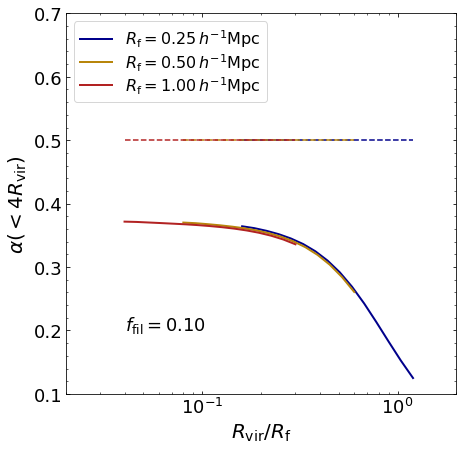

In [5]:
Rvir = np.logspace(np.log10(0.04),np.log10(0.3),15) # virial radius in Mpc/h
cvir = 7.0/Rvir**0.2 
mvir = mvir_from_Rvir(Rvir)

f_fil = 0.1
Dfil = f_fil*Dvir/(2*(1-np.exp(-1/2)))
Rfil_vals = np.array([0.25,0.5,1.0])
COLS = ['darkblue','darkgoldenrod','firebrick']

alpha_avg_fil_exchalo = np.zeros((Rfil_vals.size,Rvir.size),dtype=float)
alpha_avg_fil_inchalo = np.zeros((Rfil_vals.size,Rvir.size),dtype=float)

RFAC = 4.0

for r in range(Rvir.size):
    gm = GaussMixNFW(Rvir=Rvir[r],cvir=cvir[r])

    for f in range(Rfil_vals.size):
        Rfil = np.array([Rfil_vals[f]])
        WDfil = (Dfil/Dvir)*np.array([1.0]) 

        Delta_avg_fil = ai.Delta_avg_filaxis(RFAC*Rvir[r],Rfil,WDfil)
        Delta_avg_fil_internal = gm.nfwGM_avg(RFAC*cvir[r])
        t_avg_fil = ai.t_avg_filaxis(RFAC*Rvir[r],Rfil,WDfil)
        alpha_avg_fil_exchalo[f,r] = ai.alpha_avg(Delta_avg_fil,t_avg_fil)
        alpha_avg_fil_inchalo[f,r] = ai.alpha_avg(Delta_avg_fil+Delta_avg_fil_internal,t_avg_fil)


figfile = "filhalo-alpha.png"

fig = plt.figure(figsize=(FSIZE,FSIZE))
plt.xscale('log')
plt.xlim([0.02,2])
plt.ylim([0.1,0.7])
plt.xlabel("$R_{{\\rm vir}}/R_{{\\rm f}}$")
plt.ylabel("$\\alpha(<4R_{{\\rm vir}})$")
for f in range(Rfil_vals.size):
    plt.plot(Rvir/Rfil_vals[f],alpha_avg_fil_inchalo[f],'-',c=COLS[f],lw=2.0,
             label="$R_{{\\rm f}} = {0:.2f}\\,h^{{-1}}{{\\rm Mpc}}$".format(Rfil_vals[f]))
    plt.plot(Rvir/Rfil_vals[f],alpha_avg_fil_exchalo[f],'--',c=COLS[f],lw=1.5)
plt.text(0.04,0.2,"$f_{{\\rm fil}} = {0:.2f}$".format(f_fil),fontsize=18)
plt.legend(loc='upper left')
plt.minorticks_on()
plt.savefig(figfile,bbox_inches='tight')

.
.
.
## Spherically averaged tidal tensor at off-center (satellite) location in NFW host halo
### Includes effect of satellite profile modelled as truncated NFW 
(assumes toy model of average mass loss as function of host-centric distance)

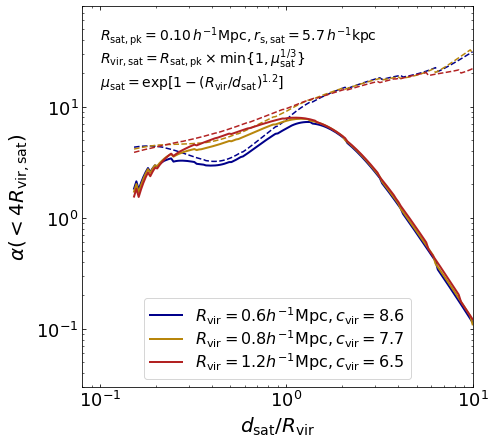

In [14]:
rforce = 2.0

# Host properties
Rvir = np.array([0.6,0.8,1.2]) # host virial radius in Mpc/h
cvir = 7/Rvir**0.4  # halo concentration (approx Bullock+01)
COLS = ['darkblue','darkgoldenrod','firebrick']

# Satellite properties (part I)
Rsat_pk = 0.1 # satellite peak Rvir
csat_pk = 7/Rsat_pk**0.4 # satellite peak concentration
mu_exp = 1.2 # exponent controlling mass loss

# host-centric satellite distance in units of host Rvir
dsat_by_Rvir = np.logspace(np.log10(10*1e-3*rforce/Rvir[0]),1.0,200) 

# host-centric satellite distance in Mpc/h
dsat = np.outer(Rvir,dsat_by_Rvir)


# # print '... calculating satellite NFW profile'
gmsat = GaussMixNFW(Rvir=Rsat_pk,cvir=csat_pk,rforce=rforce)

alpha_avg_excsat = np.zeros((Rvir.size,dsat_by_Rvir.size),dtype=float)
alpha_avg_incsat = np.zeros((Rvir.size,dsat_by_Rvir.size),dtype=float)
Rvir_sat = np.zeros((Rvir.size,dsat_by_Rvir.size),dtype=float)
#XJ = np.zeros(21,dtype=float)

for h in range(Rvir.size):
    # # print 'Rvir,cvir: ',Rvir[h],cvir[h]
    gm = GaussMixNFW(Rvir=Rvir[h],cvir=cvir[h],rforce=rforce)
    
    for s in range(dsat_by_Rvir.size):
        ################################
        # Satellite properties (part II)
        # ... truncation model
        ################################
        # mass fraction relative to peak mass: toy Kepler-like model (can be updated)
        mu_sat = 1.0 if (dsat_by_Rvir[s] >= 1.0) else np.exp(1-(1/dsat_by_Rvir[s])**mu_exp) 
        ################################
        # current satellite radius
        Rvs = Rsat_pk*mu_sat**(1/3.) 
        Rvir_sat[h,s] = Rvs
        ################################
        # smoothing radius for tidal anisotropy
        Rsmooth = 4*Rvs 
        ################################
        
        ################################
        # Truncation
        # ... assume truncation below scale radius will disrupt satellite
        if Rvs > gmsat.rs:
            gmsat.JVALS = np.where(gmsat.CJ < Rvs/gmsat.rs)[0] 
            Delta_avg_sat_internal = gmsat.nfwGM_avg(Rsmooth/gmsat.rs)
            Delta_avg_sat = ai.Delta_avg_offcsat(Rsmooth,gm.rs,dsat[h,s],gm.CJ,gm.WJ*gm.DJ)
            t_avg_sat = ai.t_avg_offcsat(Rsmooth,gm.rs,dsat[h,s],gm.CJ,gm.WJ*gm.DJ)
            alpha_avg_excsat[h,s] = ai.alpha_avg(Delta_avg_sat,t_avg_sat)
            alpha_avg_incsat[h,s] = ai.alpha_avg(Delta_avg_sat+Delta_avg_sat_internal,t_avg_sat)
        else:
            alpha_avg_excsat[h,s] = np.nan
            alpha_avg_incsat[h,s] = np.nan

figfile = 'satellite-alpha.png'
FS = 14
fig = plt.figure(figsize=(FSIZE,FSIZE))
plt.xscale('log')
plt.yscale('log')
plt.xlim([0.08,10])
plt.ylim([3e-2,80])
plt.xlabel("$d_{{\\rm sat}}/R_{{\\rm vir}}$")
plt.ylabel("$\\alpha(<4R_{{\\rm vir,sat}})$")
for h in range(Rvir.size):
    plt.plot(dsat_by_Rvir,alpha_avg_incsat[h],'-',c=COLS[h],lw=2.0,
             label="$R_{{\\rm vir}} = {0:.1f}h^{{-1}}{{\\rm Mpc}},c_{{\\rm vir}} = {1:.1f}$"
             .format(Rvir[h],cvir[h]))
    plt.plot(dsat_by_Rvir,alpha_avg_excsat[h],'--',c=COLS[h],lw=1.5)
XTEXT = 1e-1
plt.text(XTEXT,40,"$R_{{\\rm sat,pk}} = {0:.2f}\\,h^{{-1}}{{\\rm Mpc}},$".format(Rsat_pk)+
         "$r_{{\\rm s,sat}} = {0:.1f}\\,h^{{-1}}{{\\rm kpc}}$".format(1e3*gmsat.rs),
         fontsize=FS)
plt.text(XTEXT,25,"$R_{{\\rm vir,sat}} = R_{{\\rm sat,pk}}\\times{{\\rm min}}\\{1,\\mu_{{\\rm sat}}^{{1/3}}\\}$",
         fontsize=FS)
plt.text(XTEXT,15,"$\\mu_{{\\rm sat}} = \\exp[1-(R_{{\\rm vir}}/d_{{\\rm sat}})^{{{0:.1f}}}]$"
         .format(mu_exp),
         fontsize=FS)
plt.legend(loc='lower center')
plt.minorticks_on()
plt.savefig(figfile,bbox_inches='tight')

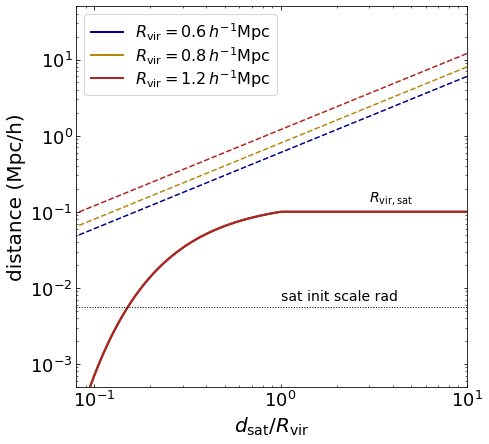

In [7]:
fig = plt.figure(figsize=(FSIZE,FSIZE))
plt.xscale('log')
plt.yscale('log')
plt.xlim([0.08,10])
plt.ylim([5e-4,50])
plt.xlabel("$d_{{\\rm sat}}/R_{{\\rm vir}}$")
plt.ylabel("distance (Mpc/h)")
for h in range(Rvir.size):
    plt.plot(dsat_by_Rvir,Rvir_sat[h],'-',c=COLS[h],lw=2.0,
             label="$R_{{\\rm vir}} = {0:.1f}\\,h^{{-1}}{{\\rm Mpc}}$".format(Rvir[h]))
    plt.plot(dsat_by_Rvir,dsat[h],'--',c=COLS[h],lw=1.5)
plt.axhline(Rsat_pk/csat_pk,ls=':',c='k',lw=1.0)
plt.text(1,1.2*Rsat_pk/csat_pk,"sat init scale rad",fontsize=FS)
plt.text(3,1.4*Rsat_pk,"$R_{{\\rm vir,sat}}$",fontsize=FS)
plt.legend(loc='upper left')
plt.minorticks_on()
plt.show()

.
.
.
## Anisotropic NFW 1-halo term
### Halo profile (c.f. [Jing & Suto 2002](https://ui.adsabs.harvard.edu/abs/2002ApJ...574..538J/abstract))
### $\displaystyle \Delta(\mathbf{r}|b) = \Delta_{\rm NFW}\left(\sqrt{z^2+(x^2+y^2)/b^2}|R_{\rm vir},c_{\rm vir}\right)$
### $\displaystyle \phantom{\Delta(\mathbf{r}|b)} = \Delta_{\rm NFW}\left(\frac{r}{b}\sqrt{1+(1-b^2)\mu^2}|R_{\rm vir},c_{\rm vir}\right)$

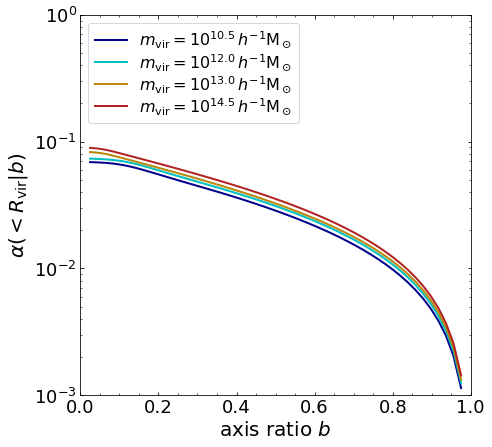

In [8]:
b_vals = np.linspace(0.025,0.975,50)

Rvir = np.array([0.0535,0.17,0.37,1.15]) # virial radius in Mpc/h
cvir = 7.0/Rvir**0.2 
mvir = mvir_from_Rvir(Rvir)

COLS = ['darkblue','c','darkgoldenrod','firebrick']

alpha_avg_ahalo = np.zeros((Rvir.size,b_vals.size),dtype=float)

RFAC = 1.0

for r in range(Rvir.size):
    gm = GaussMixNFW(Rvir=Rvir[r],cvir=cvir[r])

    for b in range(b_vals.size):
        Delta_avg_ahalo = ai.Delta_avg_anisohalo(RFAC*Rvir[r],Rvir[r]/cvir[r],b_vals[b],gm.CJ,gm.WJ*gm.DJ)
        t_avg_ahalo = ai.t_avg_anisohalo(RFAC*Rvir[r],Rvir[r]/cvir[r],b_vals[b],gm.CJ,gm.WJ*gm.DJ)
        alpha_avg_ahalo[r,b] = ai.alpha_avg(Delta_avg_ahalo,t_avg_ahalo)


figfile = "anisohalo-alpha.png"

fig = plt.figure(figsize=(FSIZE,FSIZE))
plt.xlim([0,1])
plt.yscale('log')
plt.ylim([1e-3,1])
plt.xlabel("axis ratio $b$")
plt.ylabel("$\\alpha(<R_{{\\rm vir}}|b)$".format(RFAC))
for r in range(Rvir.size):
    plt.plot(b_vals,alpha_avg_ahalo[r],'-',c=COLS[r],lw=2.0,
             label="$m_{{\\rm vir}} = 10^{{{0:.1f}}}\\,h^{{-1}}{{\\rm M_\\odot}}$".format(np.log10(mvir[r])))
plt.legend(loc='upper left')
plt.minorticks_on()
plt.savefig(figfile,bbox_inches='tight')

# Plots for paper

### Basic fit \[Figures 1 & 6 of [arXiv:2006.xxxxx](https://arxiv.org)\]

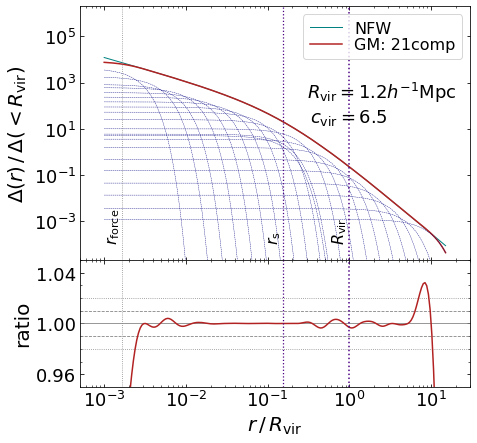

In [9]:
rforce = 2.0
Rvir = 1.2 # virial radius in Mpc/h
cvir = 7.0/Rvir**0.4 # halo concentration
TRUNCATE = False

gm = GaussMixNFW(Rvir=Rvir,cvir=cvir,rforce=rforce)

xmin = 1e-3*cvir
xmax = 15*cvir
nx = 200
xv = np.logspace(np.log10(xmin),np.log10(xmax),nx)


figfile = "gmNFW-Rvir{0:.1f}Mpch-cvir{1:.1f}-rforce{2:.1f}kpch".format(gm.Rvir,gm.cvir,gm.rforce)
if TRUNCATE:
    figfile = figfile + '-truncated'
figfile = figfile + '.png'

if TRUNCATE:
    gm.JVALS = np.where(gm.CJ < 0.1*gm.cvir)[0]
else:
    gm.JVALS = np.arange(gm.NCOMP)

FS = 18 # text fontsize
if TRUNCATE:
    fig = plt.figure(figsize=(FSIZE,FSIZE))
    gs = gridspec.GridSpec(2,1,height_ratios=[4,1],hspace=0.0)
else:
    fig = plt.figure(figsize=(FSIZE,FSIZE))
    gs = gridspec.GridSpec(2,1,height_ratios=[2,1],hspace=0.0)
XMIN = 0.5*xmin/gm.cvir
XMAX = 2*xmax/gm.cvir
YMIN = 2e-5
YMAX = 2e6
sub1 = plt.subplot(gs[0])
sub1.axis([XMIN,XMAX,YMIN,YMAX])        
sub1.set_ylabel("$\\Delta(r) \,/\, \\Delta(<R_{{\\rm vir}})$")
sub1.set_xscale('log')
sub1.set_yscale('log')
sub1.plot(xv/gm.cvir,gm.nfw(xv),'-',color='teal',label="NFW",lw=1.0)
sub1.plot(xv/gm.cvir,gm.nfwGM(xv),'-',color='firebrick',
              label="GM: {0:d}comp".format(gm.JVALS.size),lw=1.5)
for j in gm.JVALS:
    sub1.plot(xv/gm.cvir,gm.WJ[j]*gm.gauss(xv,gm.CJ[j]),'--',color='navy',lw=0.4)
sub1.legend(loc='upper right')
plt.text(0.3,2e2,
         "$R_{{\\rm vir}} = {0:.1f}h^{{-1}}{{\\rm Mpc}}$".format(gm.Rvir),
        fontsize=FS)
plt.text(0.33,2e1,
         "$c_{{\\rm vir}} = {0:.1f}$".format(gm.cvir),
        fontsize=FS)
if TRUNCATE:
    plt.text(1e-3,2e5,"truncated",fontsize=FS)
plt.text(1e-3*gm.rforce/gm.Rvir,1e-4,"$r_{{\\rm force}}$",fontsize=FS-2,rotation=90,ha='right',va='bottom')
plt.text(gm.rs/gm.Rvir,1e-4,"$r_{{\\rm s}}$",fontsize=FS-2,rotation=90,ha='right',va='bottom')
plt.text(1.0,1e-4,"$R_{{\\rm vir}}$",fontsize=FS-2,rotation=90,ha='right',va='bottom')
sub1.axvline(1e-3*gm.rforce/gm.Rvir,ls=':',c='gray',lw=0.8)
sub1.axvline(gm.rs/gm.Rvir,ls=':',c='indigo',lw=1.25)
sub1.axvline(1.0,ls=':',c='indigo',lw=1.5)


sub2 = plt.subplot(gs[1],sharex=sub1)
if TRUNCATE:
    YMIN = 0
    YMAX = 1.5
    #sub2.set_yscale('log')
    sub2.axis([XMIN,XMAX,YMIN,YMAX])        
else:
    YMIN = 0.95
    YMAX = 1.05
    sub2.axis([XMIN,XMAX,YMIN,YMAX])        
    sub2.yaxis.set_ticks([0.96,1.00,1.04])
    sub2.axhline(0.98,ls=':',color='gray',lw=0.8)
    sub2.axhline(0.99,ls='--',color='gray',lw=0.8)
    sub2.axhline(1.01,ls='--',color='gray',lw=0.8)
    sub2.axhline(1.02,ls=':',color='gray',lw=0.8)
sub2.axhline(1.0,ls='-',color='gray',lw=0.8)
sub2.set_xlabel("$r \,/\, R_{{\\rm vir}}$")
sub2.set_ylabel("ratio")
sub2.set_xscale('log')
sub2.plot(xv/gm.cvir,gm.nfwGM(xv)/gm.nfw(xv),'-',color='firebrick',lw=1.5)
sub2.axvline(1e-3*gm.rforce/gm.Rvir,ls=':',c='gray',lw=0.8)
sub2.axvline(gm.rs/gm.Rvir,ls=':',c='indigo',lw=1.25)
sub2.axvline(1.0,ls=':',c='indigo',lw=1.5)

plt.minorticks_on()

#plt.savefig(figfile,bbox_inches='tight')
plt.show()

### Basic fit \[Figure 2 of [arXiv:2006.xxxxx](https://arxiv.org)\]

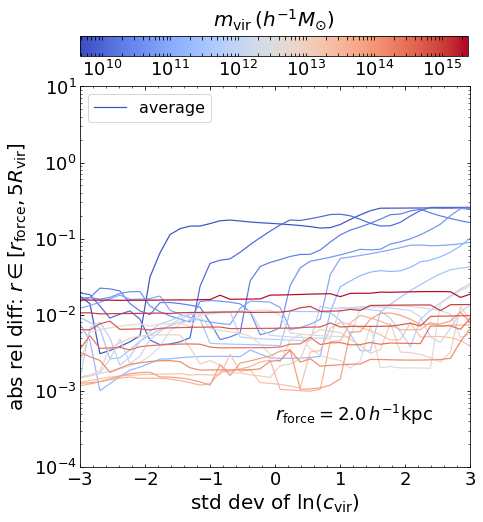

In [15]:
rforce = 2.0
Rvir = np.logspace(np.log10(0.03),np.log10(2.2),20) # virial radius in Mpc/h
mvir = mvir_from_Rvir(Rvir)
cvir_med = 7.0/Rvir**0.4
siglnc = 0.4 #0.16*np.log(10)
stddevs = np.linspace(-3,3,40)

AVG = True

CB_LABEL = "$m_{{\\rm vir}}\\, (h^{{-1}}M_{{\\odot}})$"
COLOR_BY_THIS = 1.0*np.asarray(mvir)
c_map = plt.cm.coolwarm
norm = pltcol.LogNorm(vmin=0.85*COLOR_BY_THIS.min(),vmax=1.1*COLOR_BY_THIS.max())
s_m = plt.cm.ScalarMappable(cmap=c_map,norm=norm)
s_m.set_array([])

fig_file = "error-gmNFW-"
fig_file += "avg" if AVG else "max"
fig_file += ".png"

fig = plt.figure(figsize=(7,7))
FS = 18
ax = fig.add_subplot(111,adjustable='box')
ax.set_yscale('log')
YLABEL = "abs rel diff: $r\\in[r_{{\\rm force}},5R_{{\\rm vir}}]$"
XLABEL = "std dev of $\\ln(c_{{\\rm vir}})$"
YMIN,YMAX = 1e-4,10
XMIN,XMAX = -3,3
ax.set_ylabel(YLABEL)
ax.set_xlabel(XLABEL)
ax.set_ylim(YMIN,YMAX)
ax.set_xlim(XMIN,XMAX)

for R in range(Rvir.size):
    cvir = cvir_med[R]*np.exp(siglnc*stddevs)
    abs_diff = np.zeros((2,stddevs.size),dtype=float)
    for s in range(stddevs.size):
        gm = GaussMixNFW(Rvir=Rvir[R],cvir=cvir[s],rforce=rforce)
        xmin,xmax = 1e-3*gm.rforce*cvir[s]/Rvir[R],5*cvir[s]
        xv = np.logspace(np.log10(xmin),np.log10(xmax),200)
        abs_diff[0,s] = np.max(np.fabs(gm.nfwGM(xv)/gm.nfw(xv)-1))
        abs_diff[1,s] = np.mean(np.fabs(gm.nfwGM(xv)/gm.nfw(xv)-1))
    label_max = 'maximum' if R==0 else None
    label_mean = 'average' if R==0 else None
    LW = 1.2
    if AVG:
        ax.plot(stddevs,abs_diff[1],c=s_m.to_rgba(COLOR_BY_THIS[R]),lw=LW,ls='-',label=label_mean)
    else:
        ax.plot(stddevs,abs_diff[0],c=s_m.to_rgba(COLOR_BY_THIS[R]),lw=LW,ls='--',label=label_max)
        
ax.legend(loc='upper left')
ax.minorticks_on()
cbar_axes = fig.add_axes([0.125,0.94,0.77,0.04]) # ([0.125,0.94,0.75,0.04])
cb = plt.colorbar(s_m,cax=cbar_axes,orientation='horizontal')
cb.ax.xaxis.set_label_position('top')
cb.set_label(CB_LABEL,labelpad=10)
cb.ax.xaxis.set_ticks_position('both')
if not AVG:
    TEXT = "$\\langle\\, c_{{\\rm vir}}\\, \\rangle =$"
    TEXT += "$7\\left(\\frac{{R_{{\\rm vir}}}}{{1h^{{-1}}{{\\rm Mpc}}}}\\right)^{{-0.4}}$"
    ax.text(-1,1e-3,TEXT,fontsize=FS)
    ax.text(-0.95,4e-4,"$\\sigma_{{\\ln c_{{\\rm vir}}}} = {0:.1f}$".format(siglnc),fontsize=FS)
else:
    ax.text(0,4e-4,"$r_{{\\rm force}} = {0:.1f}\\,h^{{-1}}{{\\rm kpc}}$".format(rforce),fontsize=FS)

#fig.savefig(fig_file,bbox_inches='tight')
plt.show()

### Halo in filament \[Figure 4 of [arXiv:2006.xxxxx](https://arxiv.org)\]

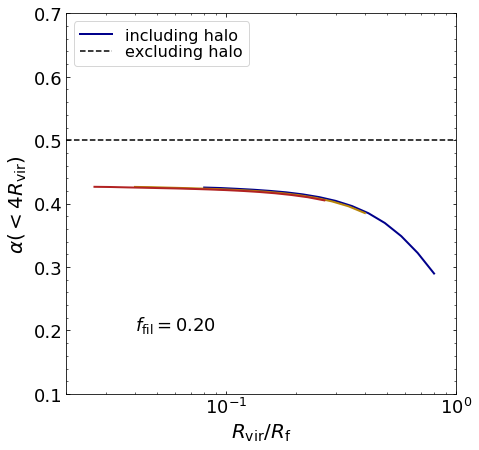

In [11]:
Rvir = np.logspace(np.log10(0.04),np.log10(0.4),15) # virial radius in Mpc/h
cvir = 7.0/Rvir**0.2 
mvir = mvir_from_Rvir(Rvir)

f_fil = 0.2
Dfil = f_fil*Dvir/(2*(1-np.exp(-1/2)))
Rfil_vals = np.array([0.5,1.0,1.5])
COLS = ['darkblue','darkgoldenrod','firebrick']

alpha_avg_fil_exchalo = np.zeros((Rfil_vals.size,Rvir.size),dtype=float)
alpha_avg_fil_inchalo = np.zeros((Rfil_vals.size,Rvir.size),dtype=float)

RFAC = 4.0

for r in range(Rvir.size):
    gm = GaussMixNFW(Rvir=Rvir[r],cvir=cvir[r])

    for f in range(Rfil_vals.size):
        Rfil = np.array([Rfil_vals[f]])
        WDfil = (Dfil/Dvir)*np.array([1.0]) 

        Delta_avg_fil = ai.Delta_avg_filaxis(RFAC*Rvir[r],Rfil,WDfil)
        Delta_avg_fil_internal = gm.nfwGM_avg(RFAC*cvir[r])
        t_avg_fil = ai.t_avg_filaxis(RFAC*Rvir[r],Rfil,WDfil)
        alpha_avg_fil_exchalo[f,r] = ai.alpha_avg(Delta_avg_fil,t_avg_fil)
        alpha_avg_fil_inchalo[f,r] = ai.alpha_avg(Delta_avg_fil+Delta_avg_fil_internal,t_avg_fil)


figfile = "filhalo-alpha-ffil{0:.2f}.png".format(f_fil)

fig = plt.figure(figsize=(FSIZE,FSIZE))
plt.xscale('log')
plt.xlim([0.02,1.0])
plt.ylim([0.1,0.7])
plt.xlabel("$R_{{\\rm vir}}/R_{{\\rm f}}$")
plt.ylabel("$\\alpha(<4R_{{\\rm vir}})$")
for f in range(Rfil_vals.size):
    if f_fil < 0.15:
        label_inchalo = "$R_{{\\rm f}} = {0:.1f}\\,h^{{-1}}{{\\rm Mpc}}$".format(Rfil_vals[f])
        label_exchalo = None
    else:
        label_inchalo = "including halo" if f==0 else None
        label_exchalo = "excluding halo" if f==0 else None
    plt.plot(Rvir/Rfil_vals[f],alpha_avg_fil_inchalo[f],'-',c=COLS[f],lw=2.0,label=label_inchalo)
    #plt.plot(Rvir/Rfil_vals[f],alpha_avg_fil_exchalo[f],'--',c=COLS[f],lw=1.5,label=label_exchalo)
    if f==0:
        plt.axhline(0.5,c='k',ls='--',lw=1.5,label=label_exchalo)
plt.text(0.04,0.2,"$f_{{\\rm fil}} = {0:.2f}$".format(f_fil),fontsize=18)
plt.legend(loc='upper left')
plt.minorticks_on()
plt.savefig(figfile,bbox_inches='tight')
plt.show()

### Satellite in halo \[Figure 7 of [arXiv:2006.xxxxx](https://arxiv.org)\]

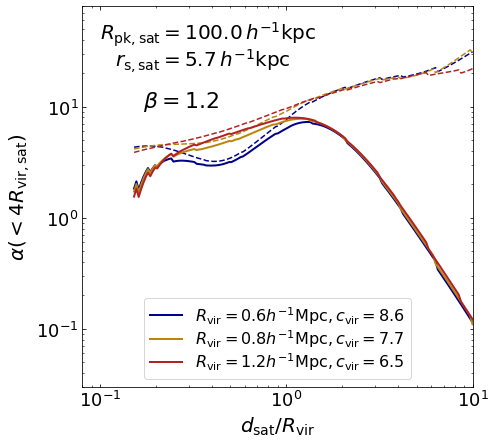

In [12]:
rforce = 2.0

# Satellite properties (part I)
Rsat_pk = 0.1 # satellite peak Rvir
mu_exp = 1.2 # exponent controlling mass loss
csat_pk = 7/Rsat_pk**0.4 # satellite peak concentration

# Host properties
Rvir = np.array([0.6,0.8,1.2]) # host virial radius in Mpc/h
cvir = 7/Rvir**0.4  # halo concentration (approx Bullock+01)
COLS = ['darkblue','darkgoldenrod','firebrick']

# host-centric satellite distance in units of host Rvir
dsat_by_Rvir = np.logspace(np.log10(10*1e-3*rforce/Rvir[0]),1.0,200) 

# host-centric satellite distance in Mpc/h
dsat = np.outer(Rvir,dsat_by_Rvir)


# print '... calculating satellite NFW profile'
gmsat = GaussMixNFW(Rvir=Rsat_pk,cvir=csat_pk,rforce=rforce)

alpha_avg_excsat = np.zeros((Rvir.size,dsat_by_Rvir.size),dtype=float)
alpha_avg_incsat = np.zeros((Rvir.size,dsat_by_Rvir.size),dtype=float)
Rvir_sat = np.zeros((Rvir.size,dsat_by_Rvir.size),dtype=float)

for h in range(Rvir.size):
    # print 'Rvir,cvir: ',Rvir[h],cvir[h]
    gm = GaussMixNFW(Rvir=Rvir[h],cvir=cvir[h],rforce=rforce)

    for s in range(dsat_by_Rvir.size):
        ################################
        # Satellite properties (part II)
        # ... truncation model
        ################################
        # mass fraction relative to peak mass: toy Kepler-like model (can be updated)
        mu_sat = 1.0 if (dsat_by_Rvir[s] >= 1.0) else np.exp(1-(1/dsat_by_Rvir[s])**mu_exp) 
        ################################
        # current satellite radius
        Rvs = Rsat_pk*mu_sat**(1/3.) 
        Rvir_sat[h,s] = Rvs
        ################################
        # smoothing radius for tidal anisotropy
        Rsmooth = 4*Rvs 
        ################################
        
        ################################
        # Truncation
        # ... assume truncation below scale radius will disrupt satellite
        if Rvs > gmsat.rs:
            gmsat.JVALS = np.where(gmsat.CJ < Rvs/gmsat.rs)[0] 
            Delta_avg_sat_internal = gmsat.nfwGM_avg(Rsmooth/gmsat.rs)
            Delta_avg_sat = ai.Delta_avg_offcsat(Rsmooth,gm.rs,dsat[h,s],gm.CJ,gm.WJ*gm.DJ)
            t_avg_sat = ai.t_avg_offcsat(Rsmooth,gm.rs,dsat[h,s],gm.CJ,gm.WJ*gm.DJ)
            #if h==0:
            #    # print Delta_avg_sat,t_avg_sat
            alpha_avg_excsat[h,s] = ai.alpha_avg(Delta_avg_sat,t_avg_sat)
            alpha_avg_incsat[h,s] = ai.alpha_avg(Delta_avg_sat+Delta_avg_sat_internal,t_avg_sat)
        else:
            alpha_avg_excsat[h,s] = np.nan
            alpha_avg_incsat[h,s] = np.nan

figfile = "satellite-alpha-Rspk{0:.2f}-muexp{1:.1f}.png".format(Rsat_pk,mu_exp)
FS = 20
fig = plt.figure(figsize=(FSIZE,FSIZE))
plt.xscale('log')
plt.yscale('log')
plt.xlim([0.08,10])
plt.ylim([3e-2,80])
plt.xlabel("$d_{{\\rm sat}}/R_{{\\rm vir}}$")
plt.ylabel("$\\alpha(<4R_{{\\rm vir,sat}})$")
if mu_exp > 0.75:
    for h in range(Rvir.size):
        plt.plot(dsat_by_Rvir,alpha_avg_incsat[h],'-',c=COLS[h],lw=2.0,
                 label="$R_{{\\rm vir}} = {0:.1f}h^{{-1}}{{\\rm Mpc}},c_{{\\rm vir}} = {1:.1f}$"
                 .format(Rvir[h],cvir[h]))
        plt.plot(dsat_by_Rvir,alpha_avg_excsat[h],'--',c=COLS[h],lw=1.5)
    if Rsat_pk < 0.125:
        plt.legend(loc='lower center')
else:
    for h in range(Rvir.size):
        LABEL_INC = "including sat" if h==0 else None
        LABEL_EXC = "excluding sat" if h==0 else None
        plt.plot(dsat_by_Rvir,alpha_avg_incsat[h],'-',c=COLS[h],lw=2.0,label=LABEL_INC)
        plt.plot(dsat_by_Rvir,alpha_avg_excsat[h],'--',c=COLS[h],lw=1.5,label=LABEL_EXC)
    if Rsat_pk < 0.125:
        plt.legend(loc='lower right')

XTEXT = 1e-1
plt.text(XTEXT,40,"$R_{{\\rm pk,sat}} = {0:.1f}\\,h^{{-1}}{{\\rm kpc}}$".format(1e3*Rsat_pk),
         fontsize=FS)
plt.text(1.2*XTEXT,23,"$r_{{\\rm s,sat}} = {0:.1f}\\,h^{{-1}}{{\\rm kpc}}$".format(1e3*gmsat.rs),
         fontsize=FS)
plt.text(1.7*XTEXT,10,"$\\beta = {0:.1f}$".format(mu_exp),fontsize=FS+2)
plt.minorticks_on()

#plt.savefig(figfile,bbox_inches='tight')
plt.show()

### Anisotropic halo \[Figure 8 of [arXiv:2006.xxxxx](https://arxiv.org)\]

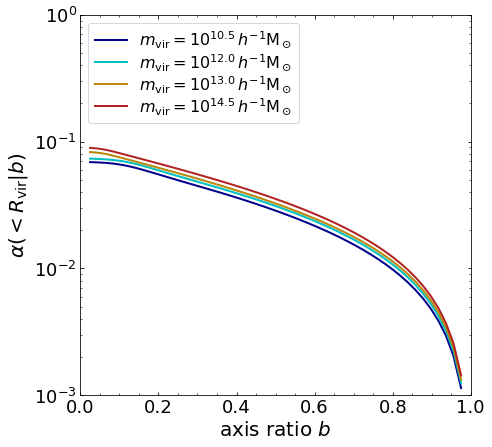

In [13]:
b_vals = np.linspace(0.025,0.975,50)

Rvir = np.array([0.0535,0.17,0.37,1.15]) # virial radius in Mpc/h
cvir = 7.0/Rvir**0.2 
mvir = mvir_from_Rvir(Rvir)

COLS = ['darkblue','c','darkgoldenrod','firebrick']

alpha_avg_ahalo = np.zeros((Rvir.size,b_vals.size),dtype=float)

RFAC = 1.0

for r in range(Rvir.size):
    gm = GaussMixNFW(Rvir=Rvir[r],cvir=cvir[r])

    for b in range(b_vals.size):
        Delta_avg_ahalo = ai.Delta_avg_anisohalo(RFAC*Rvir[r],Rvir[r]/cvir[r],b_vals[b],gm.CJ,gm.WJ*gm.DJ)
        t_avg_ahalo = ai.t_avg_anisohalo(RFAC*Rvir[r],Rvir[r]/cvir[r],b_vals[b],gm.CJ,gm.WJ*gm.DJ)
        alpha_avg_ahalo[r,b] = ai.alpha_avg(Delta_avg_ahalo,t_avg_ahalo)


figfile = "anisohalo-alpha.png"

fig = plt.figure(figsize=(FSIZE,FSIZE))
plt.xlim([0,1])
plt.yscale('log')
plt.ylim([1e-3,1])
plt.xlabel("axis ratio $b$")
plt.ylabel("$\\alpha(<R_{{\\rm vir}}|b)$".format(RFAC))
for r in range(Rvir.size):
    plt.plot(b_vals,alpha_avg_ahalo[r],'-',c=COLS[r],lw=2.0,
             label="$m_{{\\rm vir}} = 10^{{{0:.1f}}}\\,h^{{-1}}{{\\rm M_\\odot}}$".format(np.log10(mvir[r])))
plt.legend(loc='upper left')
plt.minorticks_on()

#plt.savefig(figfile,bbox_inches='tight')
plt.show()